In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def make_synthetic_dataset(n_features=50, n_informative=10, n_redundant=15, n_samples=10000):
    from sklearn.datasets import make_classification
    # n_informative features, followed by n_redundant, followed by n_repeated duplicates
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative,\
                               n_redundant=n_redundant, shuffle=False, random_state=1711)
    cols = []
    n_noise = n_features - n_informative - n_redundant
    for i in range(n_informative):
        cols.append("I" + str(i))
    for i in range(n_redundant):
        cols.append("R" + str(i))
    for i in range(n_noise):
        cols.append("N" + str(i))

    X_df = pd.DataFrame(data=X, columns=cols)
    Y_series = pd.Series(y)
    
    return X_df, Y_series

In [3]:
X, y = make_synthetic_dataset()

#### Plot features with PCA explained variance

In [4]:
pca = PCA() # Plotting the explained variance and look for the drastic decrease
X_normalized = (X - X.mean()) / X.std()
pca.fit(X_normalized)

PCA()

In [5]:
pca_col_variance = list(zip(X.columns, pca.explained_variance_))
pca_col_variance.sort(key=lambda x: (x[1], x[0]))
pca_cols, pca_variances = list(zip(*pca_col_variance))

<BarContainer object of 50 artists>

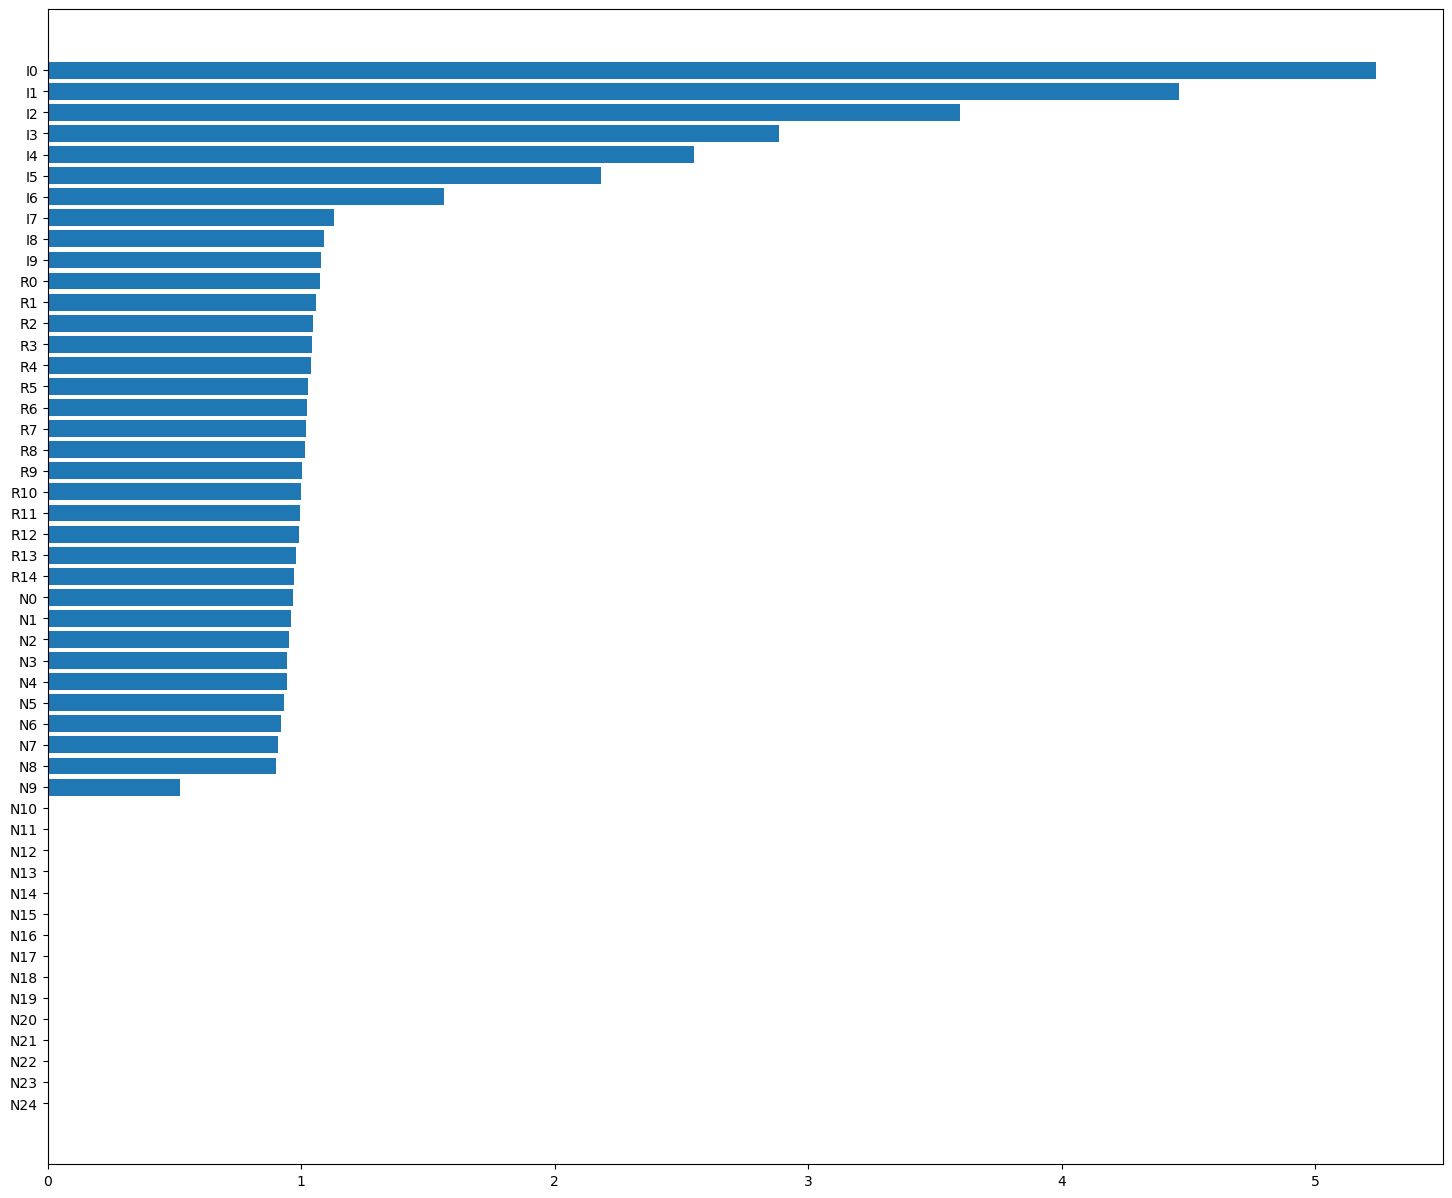

In [6]:
fig, ax = plt.subplots(figsize=(18, 15))
ax.barh(pca_cols, pca_variances)

#### Plot features with MDI on RF

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1711)
rf.fit(X, y)

RandomForestClassifier(random_state=1711)

<BarContainer object of 50 artists>

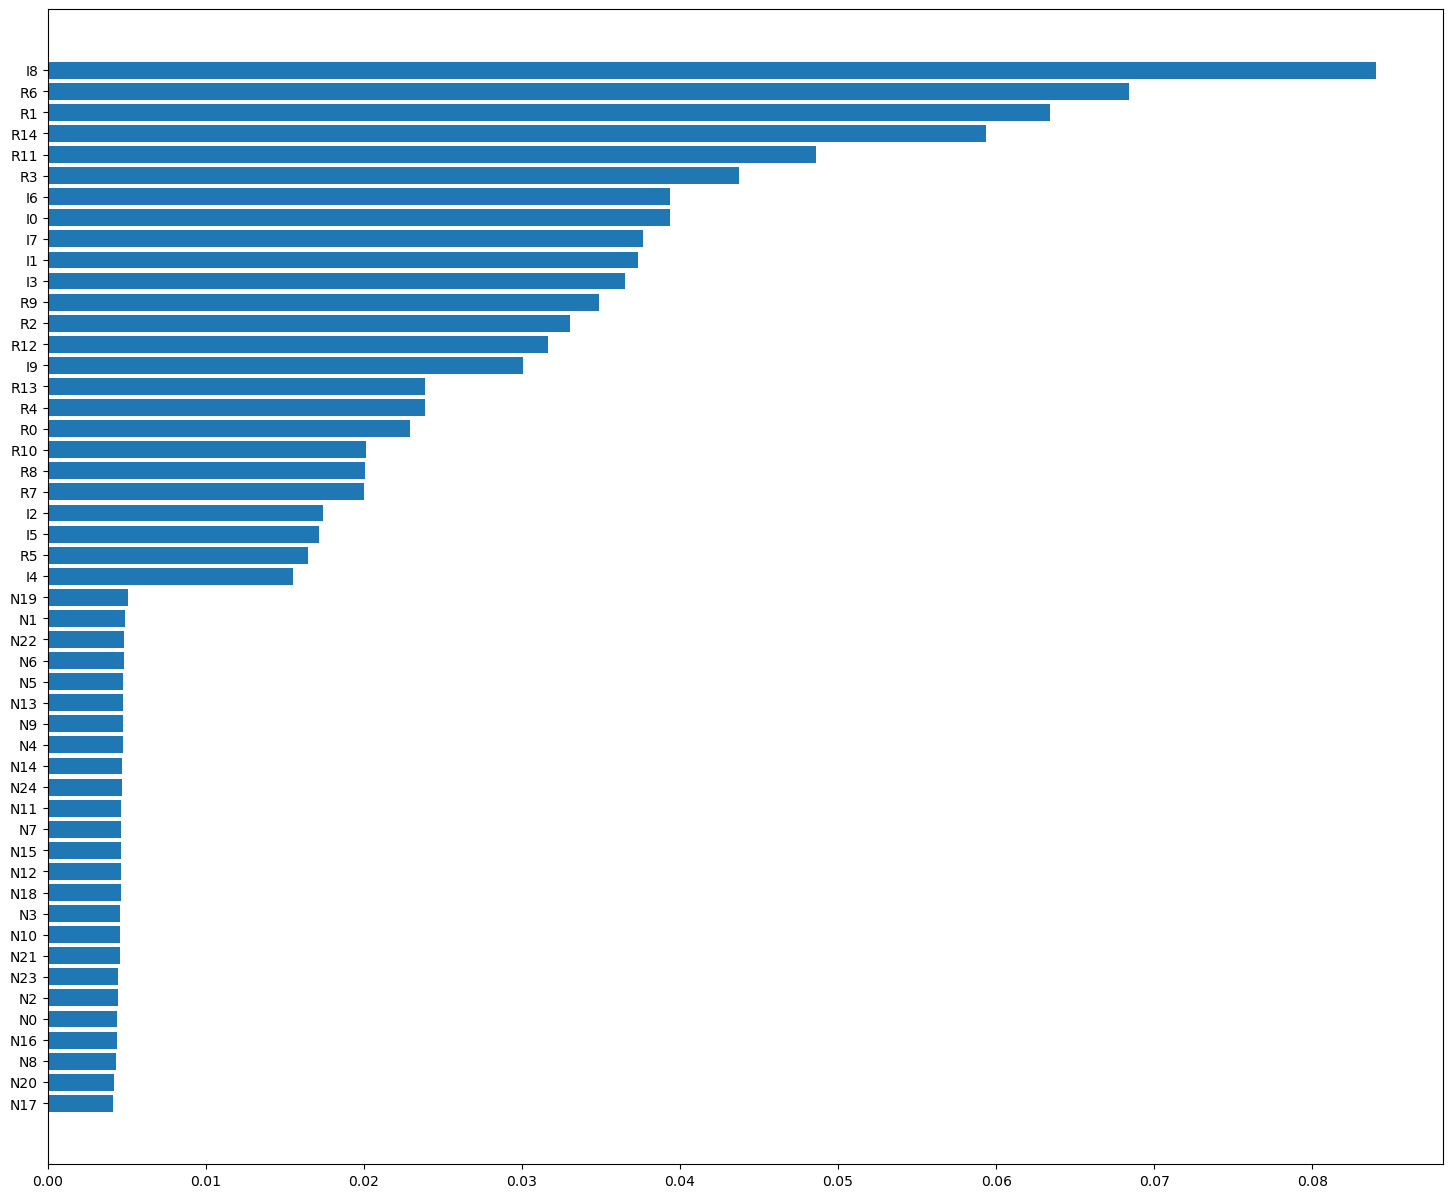

In [8]:
rf_mdi_feature_scores = list(zip(rf.feature_names_in_, rf.feature_importances_))
rf_mdi_feature_scores.sort(key=lambda x: (x[1], x[0]))
rf_features, rf_mdi = list(zip(*rf_mdi_feature_scores))

fig, ax = plt.subplots(figsize=(18, 15))
ax.barh(rf_features, rf_mdi)

#### Plot features with MDA on RF

In [9]:
from sklearn.model_selection import cross_val_score
cv_folds = 5
rf = RandomForestClassifier(random_state=1711)
baseline_accuracy = np.mean(cross_val_score(rf, X, y, cv=cv_folds))
print("RF Baseline Accurarcy = {:.4f}".format(baseline_mda_accuracy))

RF Baseline Accurarcy = 0.9243


In [10]:
mda_score_list = []
for feature in X.columns:
    rf = RandomForestClassifier(random_state=1711)
    X_shuffle = X.copy()
    X_shuffle[feature] = np.random.permutation(X_shuffle[feature])
    accuracy = np.mean(cross_val_score(rf, X_shuffle, y, cv=cv_folds))
    accuracy_diff = baseline_accuracy - accuracy
    mda_score_list.append((feature, accuracy_diff))
    print("Traing RF with shuffling feature {}, with accuracy={:.4f} and difference={:.4f}".format(feature, accuracy, accuracy_diff))

Traing RF on the single feature I0, with accuracy=0.9231 and difference=0.0012
Traing RF on the single feature I1, with accuracy=0.9220 and difference=0.0023
Traing RF on the single feature I2, with accuracy=0.9236 and difference=0.0007
Traing RF on the single feature I3, with accuracy=0.9208 and difference=0.0035
Traing RF on the single feature I4, with accuracy=0.9251 and difference=-0.0008
Traing RF on the single feature I5, with accuracy=0.9219 and difference=0.0024
Traing RF on the single feature I6, with accuracy=0.9167 and difference=0.0076
Traing RF on the single feature I7, with accuracy=0.9204 and difference=0.0039
Traing RF on the single feature I8, with accuracy=0.9257 and difference=-0.0014
Traing RF on the single feature I9, with accuracy=0.9237 and difference=0.0006
Traing RF on the single feature R0, with accuracy=0.9242 and difference=0.0001
Traing RF on the single feature R1, with accuracy=0.9249 and difference=-0.0006
Traing RF on the single feature R2, with accuracy

<BarContainer object of 50 artists>

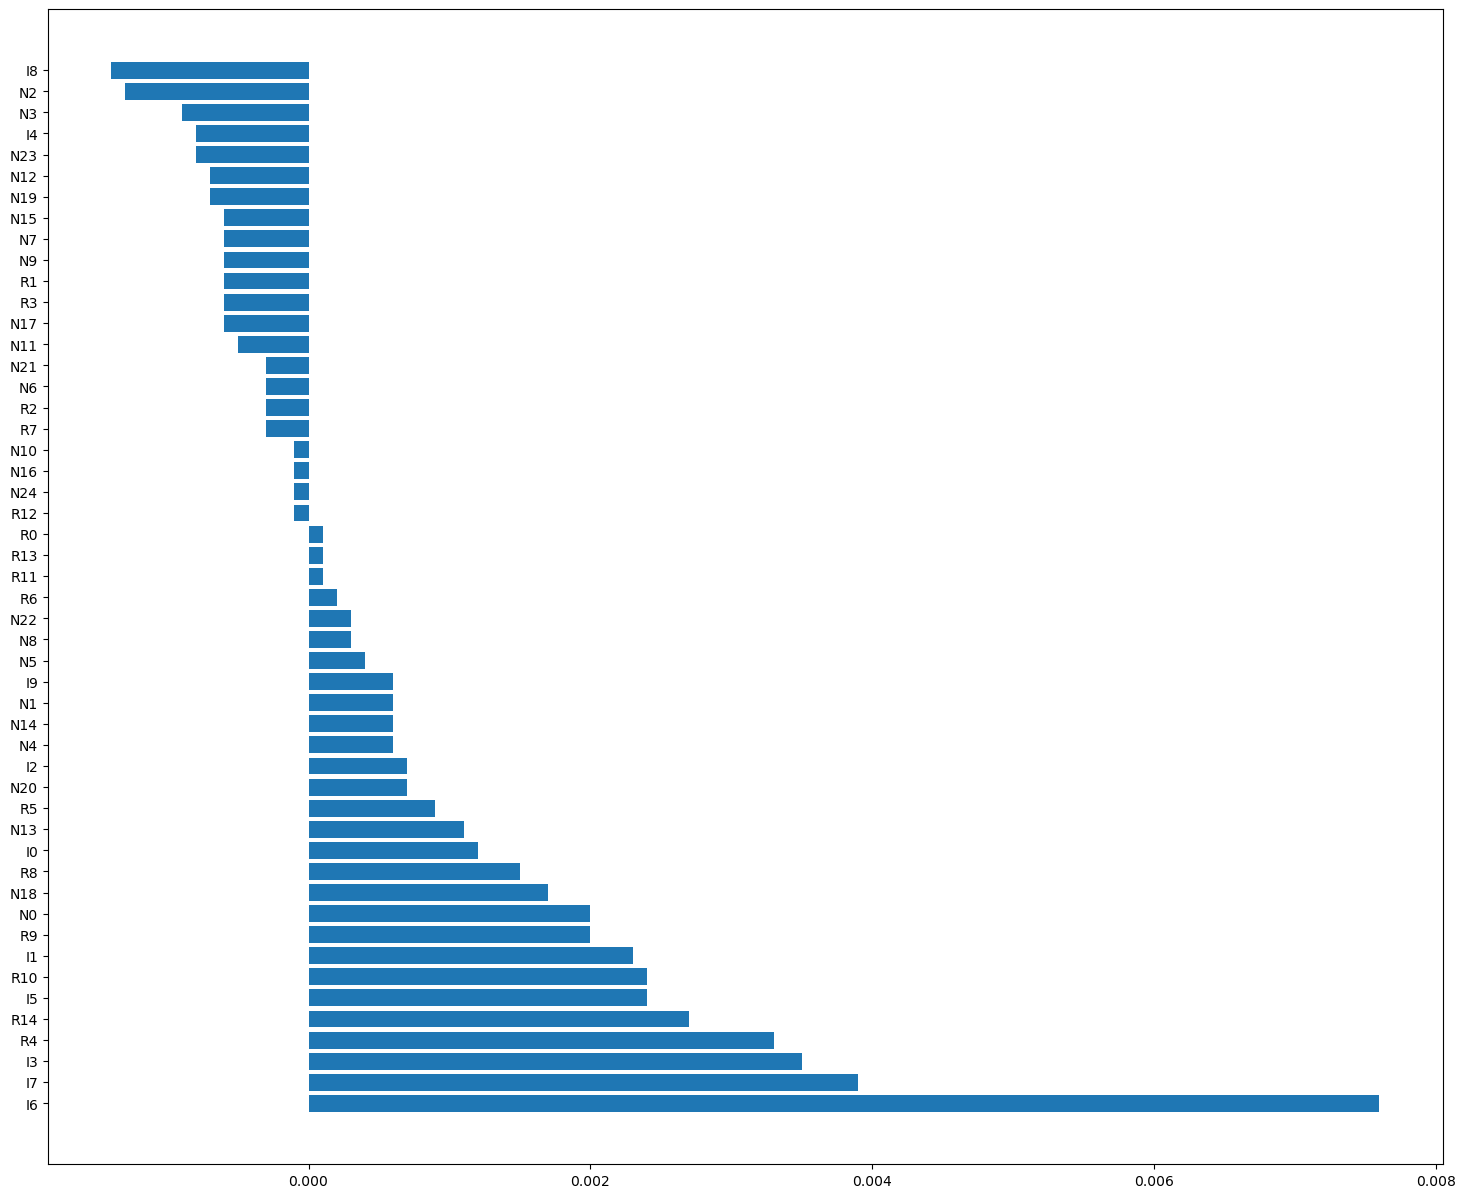

In [13]:
mda_score_list.sort(key=lambda x: (x[1], x[0]), reverse=True)
mda_features, mda_scores = list(zip(*mda_score_list))

fig, ax = plt.subplots(figsize=(18, 15))
ax.barh(mda_features, mda_scores)

#### Plot features with SFI using RF

In [14]:
sfi_score_list = []
for feature in X.columns:
    rf = RandomForestClassifier(random_state=1711)
    accuracy = np.mean(cross_val_score(rf, X[[feature]], y, cv=cv_folds))
    accuracy_diff = baseline_accuracy - accuracy
    sfi_score_list.append((feature, accuracy_diff))
    print("Traing RF on the single feature {}, with accuracy={:.4f} and difference={:.4f}".format(feature, accuracy, accuracy_diff))

Traing RF on the single feature I0, with accuracy=0.5522 and difference=0.3721
Traing RF on the single feature I1, with accuracy=0.5550 and difference=0.3693
Traing RF on the single feature I2, with accuracy=0.4978 and difference=0.4265
Traing RF on the single feature I3, with accuracy=0.5373 and difference=0.3870
Traing RF on the single feature I4, with accuracy=0.4926 and difference=0.4317
Traing RF on the single feature I5, with accuracy=0.4952 and difference=0.4291
Traing RF on the single feature I6, with accuracy=0.5431 and difference=0.3812
Traing RF on the single feature I7, with accuracy=0.5298 and difference=0.3945
Traing RF on the single feature I8, with accuracy=0.6180 and difference=0.3063
Traing RF on the single feature I9, with accuracy=0.5373 and difference=0.3870
Traing RF on the single feature R0, with accuracy=0.4997 and difference=0.4246
Traing RF on the single feature R1, with accuracy=0.5856 and difference=0.3387
Traing RF on the single feature R2, with accuracy=0.

<BarContainer object of 50 artists>

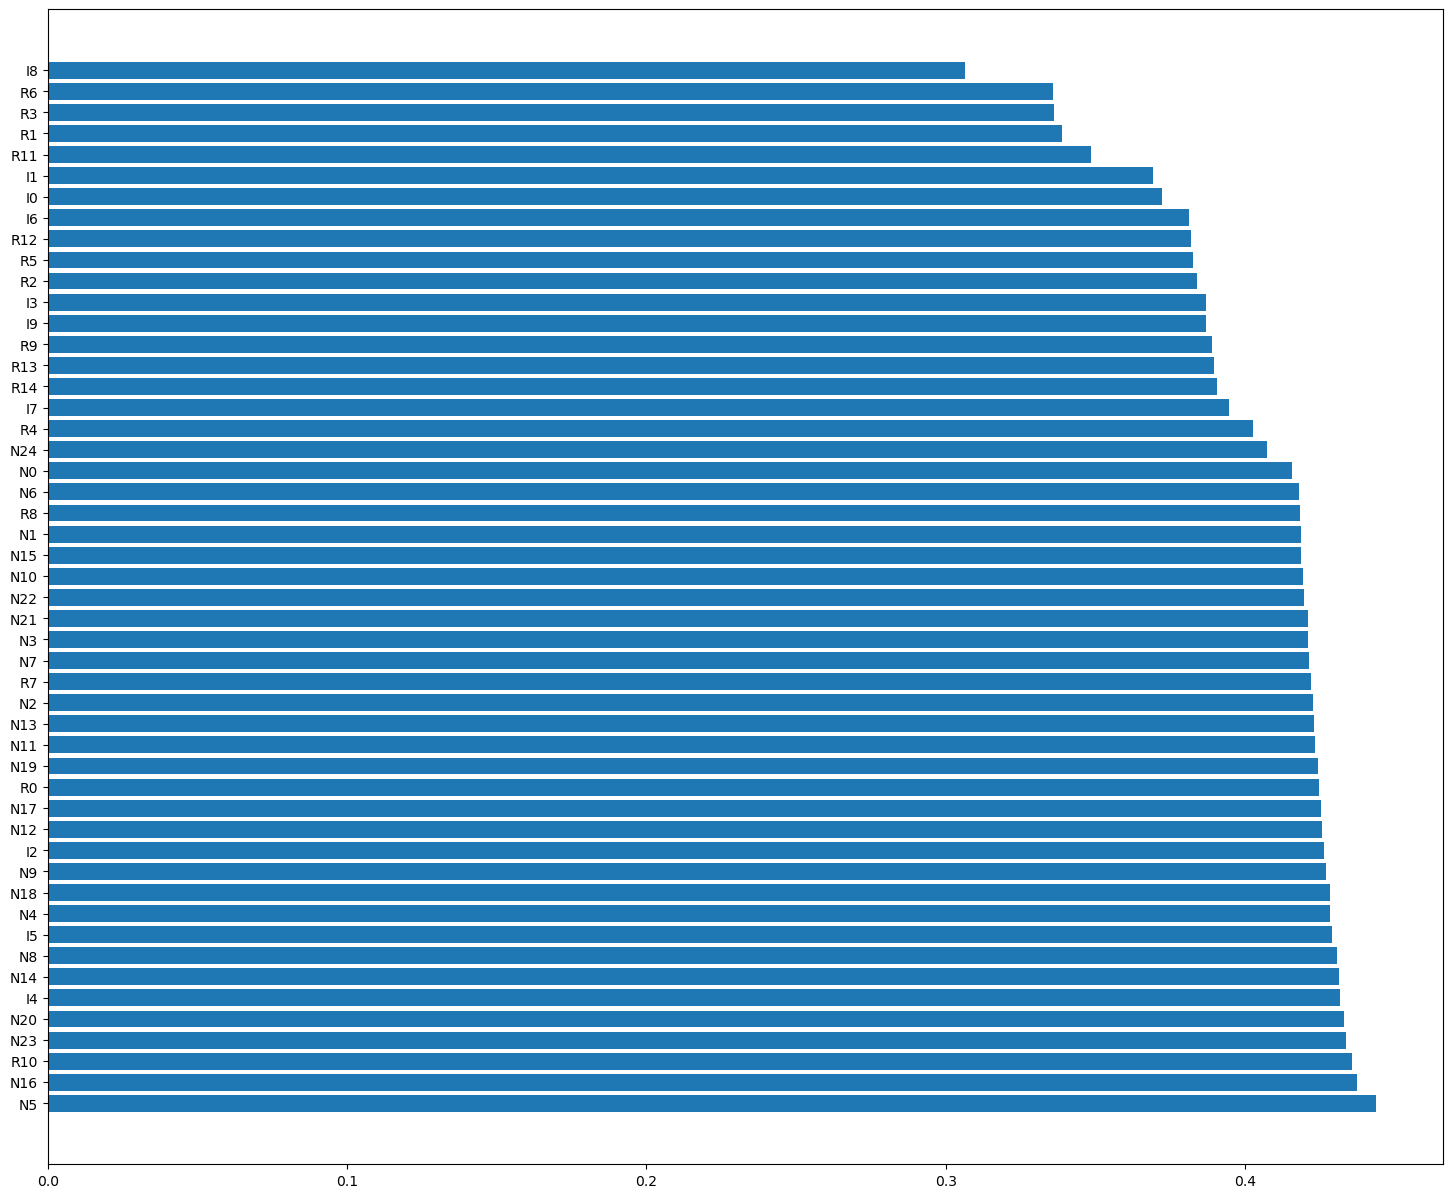

In [15]:
sfi_score_list.sort(key=lambda x: (x[1], x[0]), reverse=True)
sfi_features, sfi_scores = list(zip(*sfi_score_list))

fig, ax = plt.subplots(figsize=(18, 15))
ax.barh(sfi_features, sfi_scores)